In [52]:
import numpy as np
import pandas as pd

In [53]:
from sklearn import datasets
df = datasets.load_iris(as_frame=True)
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [54]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [55]:
df = df.data.join([df.target])[df.target != 0]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [56]:
Y = df.target

In [57]:
X = df.iloc[:, [2, 3]]

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

In [59]:
# model = make_pipeline(StandardScaler(), LogisticRegression())
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [60]:
model.fit(X_train, y_train)

LogisticRegression()

In [93]:
y_pred = model.predict(X_test)

In [62]:
model.score(X_train, y_train)

0.9428571428571428

In [64]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'length')

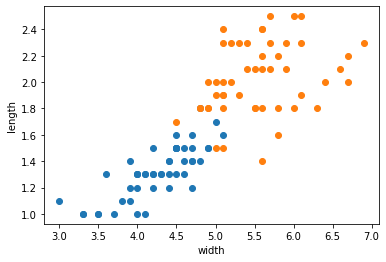

In [68]:
plt.scatter(df.iloc[:, [2]][df.target == 1], df.iloc[:, [3]][df.target == 1])
plt.scatter(df.iloc[:, [2]][df.target == 2], df.iloc[:, [3]][df.target == 2])
plt.xlabel('width')
plt.ylabel('length')

In [86]:
indexes = [i for i in range(X_test.shape[0])]

In [94]:
X_test.index = indexes

In [105]:
prediction = X_test.join(pd.DataFrame(y_pred))
prediction.columns = ['width', 'length', 'pred']

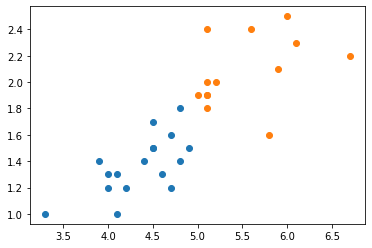

In [108]:
plt.scatter(prediction.width[prediction.pred == 1], prediction.length[prediction.pred == 1])
plt.scatter(prediction.width[prediction.pred == 2], prediction.length[prediction.pred == 2])